# Homework 7: Dimension Reduction

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'huangmy'

# Download the data:
For this assignment, we will be using a gene expression dataset by Golub et al. (1999).

https://www.kaggle.com/crawford/gene-expression

>This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

A Kaggle user has [shared a kernel using PCA on this dataset](https://www.kaggle.com/kanav0183/pca-analysis-for-geneclassification), which, among others, you're free to use as a reference.

# Part 0: Loading the Data

As usual, load the data and use the summary functions and plots of your choice to get a sense of the data.

In [219]:
import pandas as pd
import numpy as np
import sklearn.manifold as skm
import sklearn.decomposition as skd
import sklearn.cluster as skc
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import sklearn.preprocessing as skp

%matplotlib inline

In [148]:
# feel free to change the file location 
df_train = pd.read_csv("data/homework7/data_set_ALL_AML_train.csv")
df_test = pd.read_csv("data/homework7/data_set_ALL_AML_independent.csv")
actual = pd.read_csv("data/homework7/actual.csv")

In [149]:
df_train = df_train[[col for col in df_train.columns if "call" not in col]].T
df_test = df_test[[col for col in df_test.columns if "call" not in col]].T

In [150]:
[df_train.shape, df_test.shape]

[(40, 7129), (36, 7129)]

In [151]:
df_train.index

Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')

In [152]:
df_test.index

Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [153]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [154]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42


# Part 1: MDS

## 1.1. Visualize the gene expression data in 2D or 3D using Multidimensional Scaling  (10 pts.)

In [155]:
df_train = df_train.drop(['Gene Accession Number','Gene Description'],axis = 0)
df_train.index = pd.to_numeric(df_train.index)
df_train.sort_index(inplace = True)

In [156]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [159]:
df_train.shape

(38, 7130)

In [157]:
# add cancer type information
dic = {'ALL':0,'AML':1}
df_train['cancer_type'] = list(actual[:38].cancer)
df_train.replace(dic,inplace=True)

In [164]:
# Normalization
df_train_norm = df_train.copy()
df_train_norm.iloc[:,:7129] = skp.scale(df_train_norm.iloc[:,:7129].astype(np.float))
df_train_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer_type
1,-0.861496,-0.033101,-0.351701,-0.805738,-0.168417,-0.888716,1.120068,0.280962,1.863470,0.449110,...,-0.815620,-1.758717,-0.021865,-0.405584,-0.159782,-0.033046,0.546068,-0.435820,-0.255875,0
2,-0.167723,1.037400,0.139139,0.876572,0.114600,0.293351,-1.322502,0.370212,0.023726,-0.182439,...,0.292993,-0.589006,0.092516,0.073055,-0.182892,-0.197260,-0.267043,-0.595744,0.499648,0
3,0.415047,1.358550,-2.495899,1.100880,-0.907912,-1.577008,0.353591,-1.849884,1.303018,-1.565148,...,1.524030,0.317849,-0.498816,1.724361,0.565043,2.130709,0.708690,-0.384366,-0.387270,0
4,-0.130721,0.488768,2.429729,-1.461407,-1.300484,-1.090715,0.930757,-0.578070,-0.609828,-0.388171,...,0.286192,2.749271,-0.485868,-2.152617,-0.508538,-0.800986,-2.251033,-0.526212,-2.029712,0
5,0.137537,0.341574,-0.506703,-0.115559,0.425006,1.161198,0.219688,0.883400,-0.353970,0.669195,...,-0.346330,0.633277,0.226322,-0.142332,-1.300593,-0.105493,-0.169469,-0.623557,0.138311,0


In [249]:
df_test = df_test.drop(['Gene Accession Number','Gene Description'],axis = 0)
df_test.index = pd.to_numeric(df_test.index)
df_test.sort_index(inplace = True)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81


In [250]:
df_test['cancer_type'] = list(actual[38:].cancer)
df_test.replace(dic,inplace=True)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer_type
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,1023,67,214,-135,1074,475,48,168,-70,0
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,529,-295,352,-67,67,263,-33,-33,-21,0
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,383,46,104,15,245,164,84,100,-18,0
42,22,-153,17,276,-211,-250,55,-141,0,500,...,399,16,558,24,893,297,6,1971,-42,0
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,91,-84,615,-52,1235,9,7,1545,-81,0


In [252]:
# normalize the data
df_test_norm = df_test.copy()
df_test_norm.iloc[:,:7129] = skp.scale(df_test_norm.iloc[:,:7129].astype(np.float))
df_test_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer_type
39,-2.844380,-0.257223,0.306000,1.238686,0.025884,-0.523312,-1.667952,-1.049687,0.856798,-0.936277,...,1.556109,1.104685,-0.613631,-1.506468,1.001512,1.050378,0.909252,-0.394315,-0.784861,0
40,0.249432,-0.680824,2.043929,0.923680,0.010308,-0.960346,1.338615,-2.535584,1.481976,0.327970,...,-0.164410,-2.826066,-0.043162,-0.316934,-1.568936,-0.026902,-0.587509,-0.819890,0.229552,0
41,0.552747,1.304804,-0.071469,-0.536801,-0.044209,0.423596,-0.230796,0.761249,-0.777441,-0.630544,...,-0.672903,0.876658,-1.068353,1.117503,-1.114577,-0.529972,1.574480,-0.538290,0.291659,0
42,1.571885,0.157552,0.117265,0.742313,0.127130,0.648735,0.421656,0.352627,-0.645824,1.724427,...,-0.617178,0.550906,0.808408,1.274941,0.539495,0.145869,0.133154,3.423164,-0.205196,0
43,2.348371,1.190079,-1.125237,0.513218,0.205011,-0.238577,-0.974355,-0.167436,-1.303907,-2.274892,...,-1.689890,-0.534937,1.044037,-0.054537,1.412478,-1.317606,0.151633,2.521197,-1.012586,0


In [169]:
X = skm.MDS(n_components=2).fit_transform(df_train_norm.iloc[:,:7129])
X_train_cancerSet = pd.DataFrame(X)
X_train_cancerSet['cancer_type'] = actual[:38].cancer
X_train_cancerSet.replace(dic,inplace=True)
X_train_cancerSet.head(10)

,0,1,cancer_type
0,-55.745082,-15.647823,0
1,-23.340316,-20.734783,0
2,-99.221103,-2.941785,0
3,13.910389,45.073110,0
4,29.497673,-69.101045,0
5,64.574620,32.534170,0
6,33.478858,66.012292,0
7,-96.921358,55.308176,0
8,-70.986887,-52.463746,0
9,23.583123,-5.697438,0


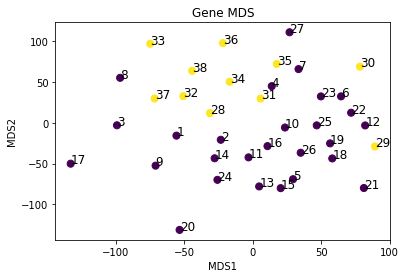

In [170]:
plt.scatter(X[:,0],X[:,1],c=X_train_cancerSet['cancer_type'],s=50)
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('Gene MDS')

for i, s in enumerate(df_train_norm.iloc[:,:-1].index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=12)

In [274]:
X = skm.MDS(n_components=3).fit_transform(df_train_norm.iloc[:,:7129])
X_train_cancerSet = pd.DataFrame(X)
X_train_cancerSet['cancer_type'] = actual[:38].cancer
X_train_cancerSet.replace(dic,inplace=True)
X_train_cancerSet.head(10)

,0,1,2,cancer_type
0,49.618878,31.514200,-20.432954,0
1,7.502959,-15.820150,57.882386,0
2,62.401840,75.505582,2.597855,0
3,37.046337,17.459290,-54.182358,0
4,24.001217,-65.549723,14.438224,0
5,-68.943459,-4.547403,-12.947098,0
6,6.178482,48.029955,-48.733869,0
7,11.720546,99.931317,-42.853570,0
8,84.122611,17.071488,12.144881,0
9,-17.262156,-22.289530,-6.395376,0


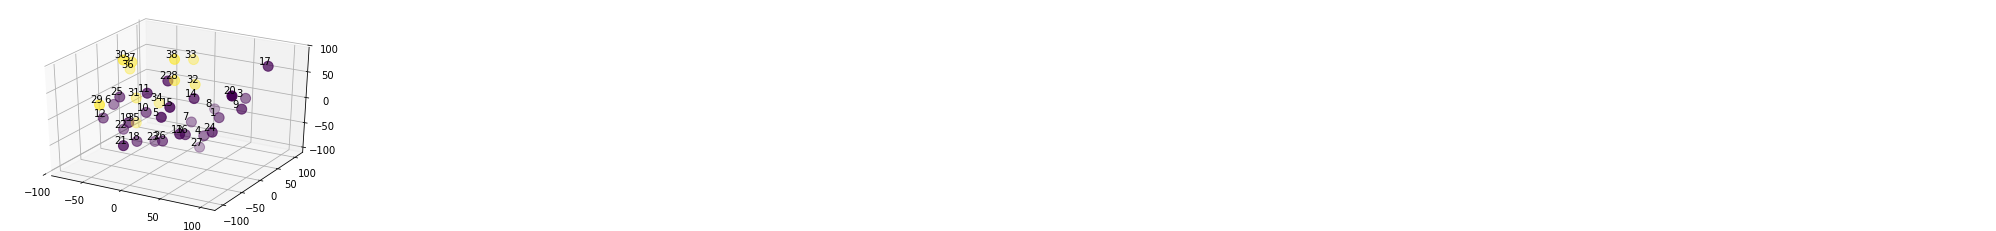

In [275]:
# 3D visualization using Multidimensional Scaling

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=X_train_cancerSet['cancer_type'], s=100)

ax.set_xticks([-100,-50,0,50,100])
ax.set_yticks([-100,-50,0,50,100])
ax.set_zticks([-100,-50,0,50,100])

for i, s in enumerate(df_train_norm.index):
    x, y, _ = proj3d.proj_transform(X[i,0],X[i,1],X[i,2],
                                    ax.get_proj())
    plt.annotate(s, xy=(x-0.005,y+0.002), fontsize=10)

## 1.2. Interprete your results (10 pts.)

What can you see from your visualization(s)?

#### Comment:
* After the data preprocessing for training data and test data, we use both 2D and 3D Multidimensional Scaling method in training set. The visualization has been shown above.
* Darker color indicates 'ALL' groups and light color indicates 'AML' groups. It is obvious that there are two clusters in both 2D and 3D figures, which indicates that samples within one groups share much in common in their feature vectors.

# Part 2: PCA

## 2.1. Perform a Principal Component Analysis of the genes in your dataset (10 pts.)

In [175]:
# Create a PCA model
pca_model = skd.PCA().fit(df_train_norm.iloc[:,:7129])
print(pca_model.components_.shape)

(38, 7129)


## 2.2. How much of the variance does each component explain? (2 pts.)

In [176]:
# These values equal to the eigenvalues of the correlation matrix.
pca_model.explained_variance_

array([1.09735759e+03, 8.76976485e+02, 4.83272186e+02, 3.57658145e+02,
       3.39170426e+02, 2.72510227e+02, 2.55597771e+02, 2.40859971e+02,
       2.18576598e+02, 1.93681882e+02, 1.83741623e+02, 1.72634428e+02,
       1.61466953e+02, 1.52866654e+02, 1.42171050e+02, 1.38629132e+02,
       1.35241393e+02, 1.25441555e+02, 1.24851480e+02, 1.20423734e+02,
       1.12430908e+02, 1.11931494e+02, 1.06610477e+02, 1.04779826e+02,
       1.03617441e+02, 1.00934278e+02, 9.86526997e+01, 9.56118071e+01,
       9.54129156e+01, 9.14541425e+01, 8.49250449e+01, 8.17690665e+01,
       7.56789591e+01, 7.30684864e+01, 6.76502725e+01, 6.28995436e+01,
       6.11190279e+01, 2.16415626e-28])

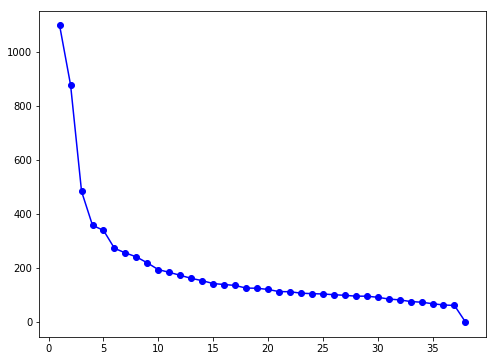

In [177]:
# A "scree" plot.
plt.figure(figsize=(8, 6))
plt.plot(range(1,39),pca_model.explained_variance_,'b-o')

#### Comment:

* Steps for PCA method in details: 
* First we obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition. Then we choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace. Thus we can construct the projection matrix W from the selected k eigenvectors. Finally, we can transform the original dataset X via W to obtain a k-dimensional feature subspace Y.

* The explained variance can be calculated from the eigenvalues and it tells us how much information/variance can be attributed to each of the principle components.

* All these positive eigenvalues and relavent 'explained variance' plot have been shown above.

## 2.3. What would be an appropriate number of components to keep? Why? (2 pts.)

In [182]:
variance = pca_model.explained_variance_
count = [item for item in variance if item > 1]
print('The appropriate number of components to keep is ' + str(len(count)))

The appropriate number of components to keep is 37


#### PCA choose criteria:
* In PCA there are three common criteria of Component selection, which you can choose base on them. But after choosing, Some may delete in next step. The criteria are:
* 1- eigenvalue one criterion: based on this criterion you choose the first components with eigenvalues higher than 1.
* 2- Amount of explained variance: based on this, the chosen factors should explain 70 to 80% of your variance at least.
* 3- Scree plot: this is a graphical method in which you choose the factors until a break in the graph.

#### Comment:
* Here we decide to use the first criteria and want to find all eigenvalues that are higher than 1. According to the output, the appropriate number of components to keep is 37.

## 2.4 Visualize your data in the reduced component space. What can you see from the visualization? (6 pts.)

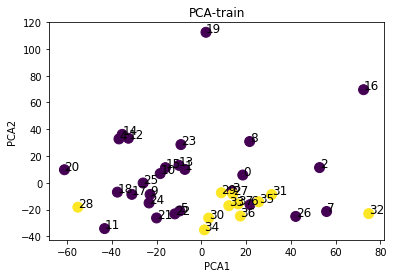

In [194]:
X = skd.PCA(n_components = 2).fit_transform(df_train_norm.iloc[:,:7129])
pcaFrame = pd.DataFrame(X)
pcaFrame['cancer_type'] = actual[:38].cancer
pcaFrame.replace(dic,inplace=True)

plt.scatter(X[:,0],X[:,1],c=X_train_cancerSet['cancer_type'], s=100)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA-train')

for i, s in enumerate(pcaFrame.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=12)

#### Comment:
* To get the visualization result, we reduce the data into 2D component space here. Similarly, darker color above indicates 'ALL' groups and light color indicates 'AML' groups. It can be seen that there are at least two obvious clusters in the reduced component space. 'ALL' and 'AML' clusters can be well distinguished in the above plot, which indicates that different groups have a lot of difference. Although the number of dimensions has been largely reduced, the clustering features can be kept quite well here.

# Part 3: Exploratory Factor Analysis

## 3.1. Create factor model with two factors and compare it to your PCA results. What are the similarities and differences? (10 pts.)

In [196]:
# Create a two-factor model
fa_model = skd.FactorAnalysis(n_components=2).fit(df_train_norm.iloc[:,:7129])

# Show the loadings
df_loadings = pd.DataFrame(fa_model.components_[:2,:].T, 
                   index=df_train_norm.iloc[:,:7129].columns,
                   columns=['Factor1', 'Factor2'])
df_loadings.head()

,Factor1,Factor2
0,-0.432488,-0.038601
1,-0.226174,-0.145885
2,0.062662,-0.081362
3,0.276153,0.190083
4,-0.657385,0.154920


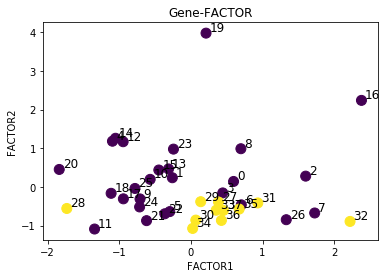

In [197]:
# EFA two factors visualizaition
X = fa_model.fit_transform(df_train_norm.iloc[:,:7129])
EFAFrame = pd.DataFrame(X)
EFAFrame['cancer_type'] = actual[:38].cancer
EFAFrame.replace(dic,inplace=True)

plt.scatter(X[:,0],X[:,1],c=X_train_cancerSet['cancer_type'], s=100)
plt.xlabel('FACTOR1')
plt.ylabel('FACTOR2')
plt.title('Gene-FACTOR')

for i, s in enumerate(EFAFrame.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=12)

#### Comment:
* Here we create a factor model with two factors first. The 2-dimension PCA and 2-factor analysis results shown above are quite similar to each other. Both of them have obvious clusters in the plot. The only difference in these two plots is that they have different ranges.

* Principal component analysis involves extracting linear composites of observed variables. We need to find new features which are the principal components of the data set. These features are the projections onto the principal component axes, which are lines that minimize the average squared distance to each point in the data set. To ensure uniqueness, all of the principal component axes must be orthogonal.
* Factor analysis is based on a formal model predicting observed variables from theoretical latent factors. Briefly stated, using PCA we are expressing each component (factor) as a linear combination of the variables, whereas in FA these are the variables that are expressed as linear combinations of the factors.

* Here the effect of 2-dimension PCA and 2-factor analysis to the data set is almost the same.

## 3.2. Create another factor model with an additional factor and compare it to the first. What might the factors represent? (10 pts.)

In [198]:
# Create a three-factor model
fa_model = skd.FactorAnalysis(n_components=3).fit(df_train_norm.iloc[:,:7129])

# Show the loadings
df_loadings = pd.DataFrame(fa_model.components_[:3,:].T, 
                   index=df_train_norm.iloc[:,:7129].columns,
                   columns=['Factor1', 'Factor2', 'Factor3'])
df_loadings.head()

,Factor1,Factor2,Factor3
0,-0.426106,-0.048566,0.144224
1,-0.216089,-0.150387,0.155109
2,0.068515,-0.080801,0.035300
3,0.294743,0.189770,0.634626
4,-0.647191,0.139660,0.361499


In [280]:
# EFA three factors visualizaition
X =fa_model.fit_transform(df_train_norm.iloc[:,:7129])
fa3Frame = pd.DataFrame(X)
fa3Frame['cancer_type'] = actual[:38].cancer
fa3Frame.replace(dic,inplace=True)
fa3Frame.head()

,0,1,2,cancer_type
0,0.560028,0.163001,-0.904156,0
1,-0.247491,0.234558,0.586023,0
2,1.556086,0.326173,-1.256044,0
3,0.419201,-0.132775,-1.048096,0
4,-1.105503,1.151913,0.302553,0


In [284]:
fa3Frame[fa3Frame['cancer_type'] == 0].describe()

,0,1,2,cancer_type
count,27.000000,27.000000,27.000000,27.0
mean,-0.167085,0.268777,-0.418524,0.0
std,1.011898,1.086716,0.638630,0.0
min,-1.848509,-1.118699,-1.797718,0.0
25%,-0.876795,-0.486837,-0.938289,0.0
50%,-0.384799,0.163001,-0.283108,0.0
75%,0.489615,0.715421,-0.023409,0.0
max,2.312247,3.971115,0.824592,0.0


In [285]:
fa3Frame[fa3Frame['cancer_type'] == 1].describe()

,0,1,2,cancer_type
count,11.000000,11.000000,11.000000,11.0
mean,0.410117,-0.659726,1.027286,1.0
std,0.935829,0.231911,1.049546,0.0
min,-1.687935,-1.071445,-0.813681,1.0
25%,0.163443,-0.865821,0.277620,1.0
50%,0.417925,-0.596396,0.951853,1.0
75%,0.664286,-0.494084,1.884841,1.0
max,2.305497,-0.389797,2.440546,1.0


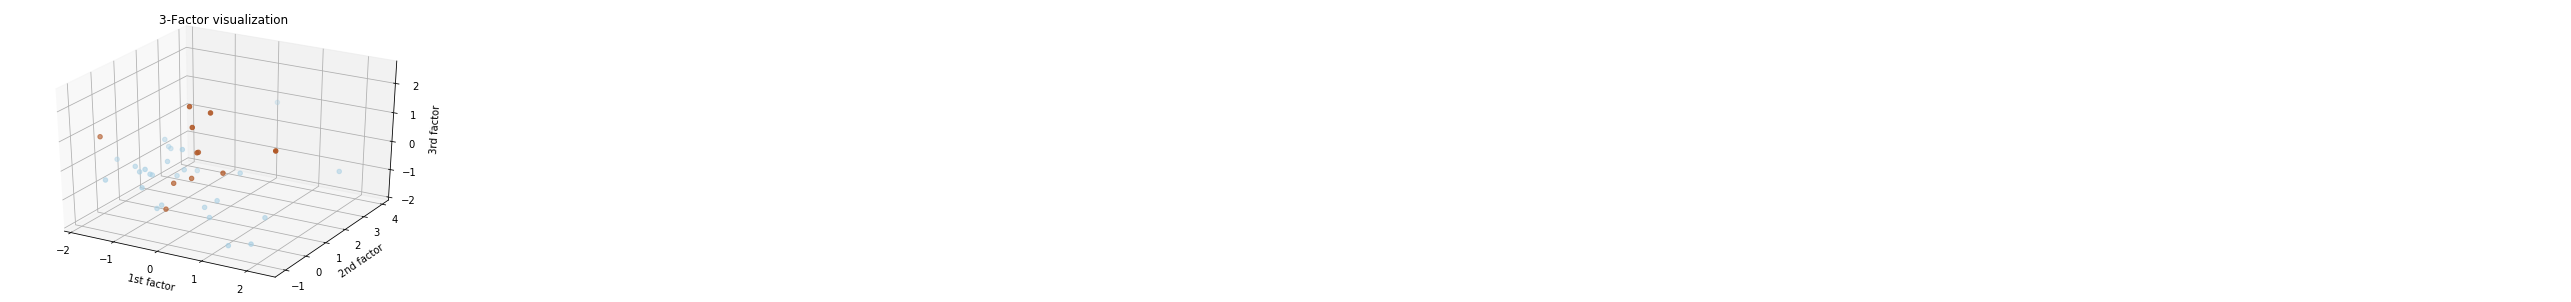

In [218]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], \
           c=X_train_cancerSet['cancer_type'], cmap=plt.cm.Paired)
ax.set_title("3-Factor visualization")
ax.set_xlabel("1st factor")
ax.set_ylabel("2nd factor")
ax.set_zlabel("3rd factor")
plt.show()

#### Comment:
* Here we create a factor model with three factors. It can be seen that there also exists some obvious clusters in this 3D dimension plot.
* Also, we give the statistical summary information for both these two groups. It can be seen that Both these two groups have relatively similar values for the first Factor. Then the second factor's values are significantly different between these two groups. Thus we can deduce that the second factor may be more helpful in telling the difference between these two groups. The third factor should also be very helpful in this case.

# Part 4: Clustering

## 4.1. Perform a cluster analysis on your data. Visualize the results in 2D or 3D using PCA. (10 pts.)

- Apply dimension reduction on the data (5 pts.)
- Choose your clustering algorithm and tune the parameter (5 pts.)

In [288]:
# dimension reduction -- using PCA method
X = skd.PCA(n_components = 2).fit_transform(df_train_norm.iloc[:,:7129])
pcaFrame = pd.DataFrame(X)
pcaFrame['cancer_type'] = actual[:38].cancer
pcaFrame.replace(dic,inplace=True)

from sklearn.metrics import accuracy_score

# clustering -- K-means algorithm
# tune and model and find the best parameters
possible_cluster = [2, 3, 4, 5, 6, 7, 8]
accuracy_record = []
for number in possible_cluster:
    k_means = KMeans(init='k-means++', n_clusters=number, n_init=10)
    k_means.fit(pcaFrame.iloc[:,:2])
    predict = list(k_means.fit_predict(pcaFrame.iloc[:,:2]))
    pcaFrame['predict'] = predict
    accuracy = accuracy_score(pcaFrame['cancer_type'], pcaFrame['predict'])
    accuracy_record.append(accuracy)

print(accuracy_record)

[0.7631578947368421, 0.7368421052631579, 0.5, 0.5, 0.10526315789473684, 0.2631578947368421, 0.07894736842105263]


In [289]:
# find highest accuracy and corresponding i
index = np.argmax(accuracy_record)
print("Based on the KNN analysis, the proper number of clusters here should be: ", possible_cluster[index])
KMeans(init='k-means++', n_clusters=possible_cluster[index], n_init=10)

Based on the KNN analysis, the proper number of clusters here should be:  2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'KNN clustering result')

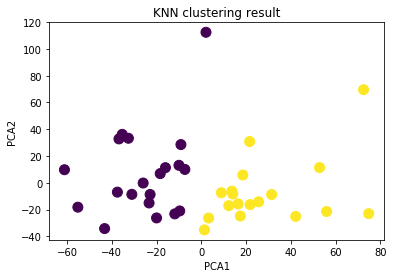

In [291]:
# clustering visualization
final_model = KMeans(init='k-means++', n_clusters=possible_cluster[index], n_init=10)
pcaFrame['predict'] = final_model.fit_predict(pcaFrame.iloc[:,:7129])
plt.scatter(pcaFrame[0],pcaFrame[1],c=pcaFrame['predict'], s=100)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KNN clustering result')

#### Comment:
* Here we use 2-dimensional space to get the visualization result. After using PCA method to reduce dimension, we introduce KNN method to get the clustering result for both training data and test data. Here we try several possible clusters and calculate the model accuracy in each case. The accuracy result has been shown above. It can be seen that the model with 2-clusters has the highest accuracy score. This result makes sense since there are only 2 labels in real cases as well.
* The KNN clustering result has also been shown above. It is obvious that there are two clusters shown above.

## 4.2. Which clusters can you identify? What does your cluster analysis tell you about the data? (10 pts.)
- Visualize your results with the test data(5 pts.)
- Interprete your results (5 pts.)

In [269]:
# PCA method to reduce dimension on test data
X = skd.PCA(n_components = 2).fit_transform(df_test_norm.iloc[:,:7129])
pcaFrame_test = pd.DataFrame(X)
pcaFrame_test['cancer_type'] = list(df_test_norm['cancer_type'])
# PCA
final_model.fit(pcaFrame.iloc[:,:2])
pcaFrame_test['predict'] = final_model.predict(pcaFrame_test.iloc[:,:2])
pcaFrame_test.head()

,0,1,cancer_type,predict
0,15.954490,-19.998652,0,1
1,22.690965,-17.487361,0,1
2,-36.249936,13.989459,0,0
3,-8.391144,15.127643,0,0
4,-26.519015,-4.337106,0,0


Text(0.5, 1.0, 'KNN clustering prediction on test data')

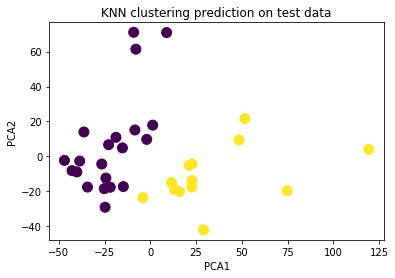

In [292]:
plt.scatter(pcaFrame_test[0],pcaFrame_test[1],c=pcaFrame_test['predict'], s=100)
plt.xlabel('PCA1') 
plt.ylabel('PCA2')
plt.title('KNN clustering prediction on test data')

In [271]:
accuracy = accuracy_score(pcaFrame_test['cancer_type'], pcaFrame_test['predict'])
print('The accuracy for prediction is ' + str(accuracy))

The accuracy for prediction is 0.7352941176470589


Text(0.5, 1.0, 'Real Label on test data')

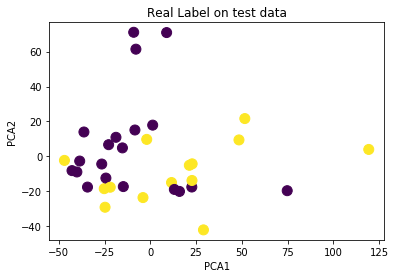

In [293]:
# compare the difference with the real data set
plt.scatter(pcaFrame_test[0],pcaFrame_test[1],c=pcaFrame_test['cancer_type'], s=100)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Real Label on test data')

#### Comment:
* Here we decide to apply our KNN modelw with 2 clusters to the test data. Normalization and data preprocessing steps have been fininshed before. The above plots have shown both the prediction result and the real case. Similarly,  darker color above indicates 'ALL' groups and light color indicates 'AML' groups. The prediction of accuracy is 73.53% and there does exist some misclassified points here.
* In a word, two groups can be approximately divided using KNN method. It can be seen that 'ALL' group has smaller PCA1 values and 'AML' group has relatively higher ones.